[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/deep-learning/activation/regression.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Keras' APIS for building models

Keras provides different APIS to build ANNs. In this notebook, you will learn the three main ones: sequential, functional, and subclassing. 

We build different regression models for the [California Housing dataset](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing) from scikit learn (20,640 instances, 8 features, 1 real target).

In [1]:
# make sure the required packages are installed
%pip install pandas numpy seaborn matplotlib scikit-learn keras tensorflow --quiet
# if running in colab, install the required packages and copy the necessary files
directory='data-science-course/deep-learning/activation'
if get_ipython().__class__.__module__.startswith('google.colab'):
    !git clone https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
    !cp --update {directory}/*.py .
    !mkdir -p img data
    !cp {directory}/img/* img/.

import tensorflow as tf
from keras.src.layers import Dense
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import keras
import numpy as np

Note: you may need to restart the kernel to use updated packages.


## Data preparation

We download, split, and print the dataset. 

In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)  # 75% train, 25% val
# Show shapes of all the datasets
print(f"Feature names: {housing.feature_names}.")
print(f"Target name: '{housing.target_names[0]}'.")
print(f"Shape of X_train = {X_train.shape} and y_train = {y_train.shape}.")
print(f"Shape of X_val = {X_val.shape} and y_val = {y_val.shape}.")
print(f"Shape of X_test = {X_test.shape} and y_test = {y_test.shape}.")

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'].
Target name: 'MedHouseVal'.
Shape of X_train = (11610, 8) and y_train = (11610,).
Shape of X_val = (3870, 8) and y_val = (3870,).
Shape of X_test = (5160, 8) and y_test = (5160,).


## Sequential API

First, we create an MLP using the sequential API.

We could scale the data or ask Keras to do it as the first layer. We choose the latter in this case. That is the purpose of the `Normalization` layer. 

In [3]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
norm_layer.adapt(X_train)
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)  # no activation function (regression)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5618 (21.95 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 17 (72.00 Byte)
____________________

Let's train the model.

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.8282 - root_mean_squared_error: 0.9101 - val_loss: 0.4290 - val_root_mean_squared_error: 0.6550
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3980 - root_mean_squared_error: 0.6309 - val_loss: 0.3878 - val_root_mean_squared_error: 0.6227
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3703 - root_mean_squared_error: 0.6085 - val_loss: 0.3362 - val_root_mean_squared_error: 0.5798
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3921 - root_mean_squared_error: 0.6262 - val_loss: 0.3209 - val_root_mean_squared_error: 0.5665
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3399 - root_mean_squared_error: 0.5830 - val_loss: 0.3144 - val_root_mean_squared_error: 0.5607
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3264 - root_mean_squared_error: 0.5713 - val_loss: 0.3005 - val_

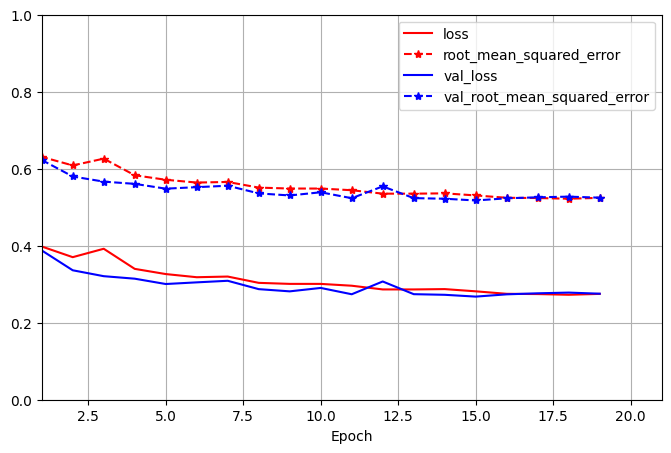

In [4]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
# Model training
EPOCHS = 20  # 20
history = model.fit(X_train, y_train, batch_size=32, epochs=EPOCHS, validation_data=(X_val, y_val))
# Show training and val errors
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[1, EPOCHS + 1], ylim=[0, 1], grid=True, xlabel="Epoch",
    # red/blue, dashed(--), continuous (-), shape(. or *)
    style=["r-", "r--*", "b-", "b--*"])  # train-loss=red(-), train-accuracy=red(--*), val_loss=blue(-), val_accuracy=blue(--*)
plt.show()

We evaluate the model and show some predictions.

162/162 [==============================] - 0s 2ms/step - loss: 0.2928 - root_mean_squared_error: 0.5411
Test MSE: 0.2928. Test RMSE: 0.5411
162/162 [==============================] - 1s 3ms/step


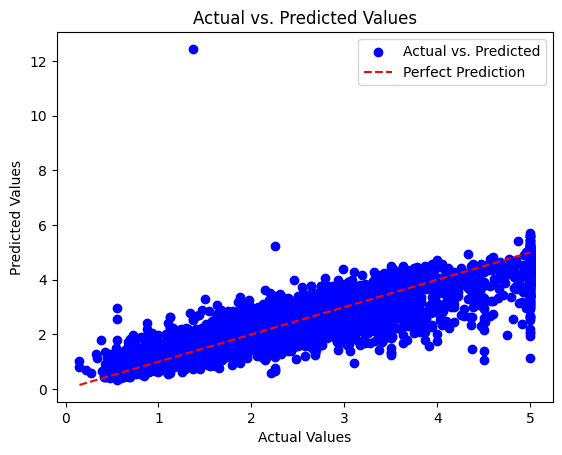

In [5]:
# Model evaluation
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse_test:.4f}. Test RMSE: {rmse_test:.4f}")

def show_predictions(model_p: keras.Model, X_test_p: np.ndarray, y_test_p: np.ndarray) -> None:
    y_pred_p = model_p.predict(X_test_p)
    plt.scatter(y_test_p, y_pred_p, color='blue', label='Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    # Add a diagonal line for reference
    plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], color='red', linestyle='--',
             label='Perfect Prediction')
    plt.legend()
    plt.show()

show_predictions(model, X_test, y_test)

## Functional API 

Now, we create the same model using the functional API. The functional API is more flexible than the sequential API. It allows multiple inputs and outputs, layer sharing and branching structures. As an example, we will create the following *Wide & Deep* ANN for regression:

<img src="img/wide-and-deep.png" width="600px"/>

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).

In [6]:
input_layer = tf.keras.layers.Input(shape=X_train.shape[1:])  # Input layer with the shape of the features
# Normalized layer is created and the input_layer is passed as an input, returning normalized as output
normalized = (normalization_layer := tf.keras.layers.Normalization())(input_layer)
hidden1 = Dense(50, activation="relu")(normalized)
hidden2 = Dense(50, activation="relu")(hidden1)
hidden3 = Dense(50, activation="relu")(hidden2)
# The normalized input (wide) plus the (deep) output of the MLP are concatenated
concat = tf.keras.layers.Concatenate()([normalized, hidden3])
# Output layer
output = Dense(1)(concat)
# The model is created by specifying the inputs and outputs (there could be many)
model = tf.keras.Model(inputs=[input_layer], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization_1 (Normaliza  (None, 8)                    17        ['input_1[0][0]']             
 tion)                                                                                            
                                                                                                  
 dense_4 (Dense)             (None, 50)                   450       ['normalization_1[0][0]']     
                                                                                                  
 dense_5 (Dense)             (None, 50)                   2550      ['dense_4[0][0]']         

We train the model.

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.9364 - root_mean_squared_error: 0.9677 - val_loss: 0.4190 - val_root_mean_squared_error: 0.6473
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3977 - root_mean_squared_error: 0.6306 - val_loss: 0.3595 - val_root_mean_squared_error: 0.5996
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3748 - root_mean_squared_error: 0.6122 - val_loss: 0.3487 - val_root_mean_squared_error: 0.5906
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3633 - root_mean_squared_error: 0.6027 - val_loss: 0.3412 - val_root_mean_squared_error: 0.5841
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3347 - root_mean_squared_error: 0.5785 - val_loss: 0.3219 - val_root_mean_squared_error: 0.5674
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3277 - root_mean_squared_error: 0.5725 - val_loss: 0.3154 - val_

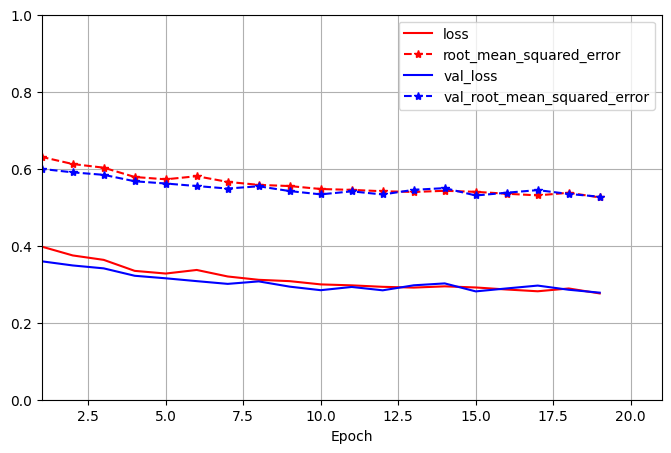

In [7]:
# Model training
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_val, y_val))
# Show training and val errors
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[1, EPOCHS + 1], ylim=[0, 1], grid=True, xlabel="Epoch",
    # red/blue, dashed(--), continuous (-), shape(. or *)
    style=["r-", "r--*", "b-", "b--*"])  # train-loss=red(-), train-accuracy=red(--*), val_loss=blue(-), val_accuracy=blue(--*)
plt.show()

Model evaluation:

162/162 [==============================] - 0s 2ms/step - loss: 0.2737 - root_mean_squared_error: 0.5232
Test MSE: 0.2737. Test RMSE: 0.5232
162/162 [==============================] - 0s 2ms/step


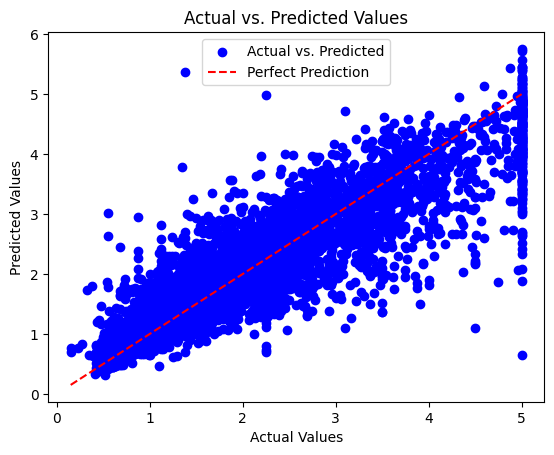

In [8]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse_test:.4f}. Test RMSE: {rmse_test:.4f}")
show_predictions(model, X_test, y_test)

## Subclassing API

The subclassing API is the most flexible one. It allows you to define your own custom layers and models using object-oriented abstractions. This is particularly useful when you need to define dynamic behavior, control flow, or complex architectures based on input data or model state. Moreover, custom layers can be defined, improving re-utilization.

We create a class that derives from `tf.keras.Model` or `tf.keras.Layer`, creates the model/layer in its constructor and performs transforms the inputs in outputs as described in the `call`method.

We create the same *Wide & Deep* model using the subclassing API. 

In [9]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units, n_hidden_layers, activation, **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer = tf.keras.layers.Normalization()
        self.hidden_layers = [Dense(units, activation=activation) for _ in range(n_hidden_layers)]
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, input, **kwargs):
        hidden = (normalized := self.norm_layer(input))
        for hidden_layer in self.hidden_layers:
            hidden = hidden_layer(hidden)
        concatenation = tf.keras.layers.concatenate([normalized, hidden])
        return self.output_layer(concatenation)

model = WideAndDeepModel(units=50, n_hidden_layers=3, activation="relu")

We train the model.

Epoch 1/20
363/363 [==============================] - 3s 3ms/step - loss: 0.8415 - root_mean_squared_error: 0.9173 - val_loss: 0.4274 - val_root_mean_squared_error: 0.6538
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4192 - root_mean_squared_error: 0.6475 - val_loss: 0.3563 - val_root_mean_squared_error: 0.5969
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3722 - root_mean_squared_error: 0.6101 - val_loss: 0.3691 - val_root_mean_squared_error: 0.6075
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3584 - root_mean_squared_error: 0.5987 - val_loss: 0.3401 - val_root_mean_squared_error: 0.5832
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3521 - root_mean_squared_error: 0.5934 - val_loss: 0.3238 - val_root_mean_squared_error: 0.5691
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3385 - root_mean_squared_error: 0.5818 - val_loss: 0.3125 - val_

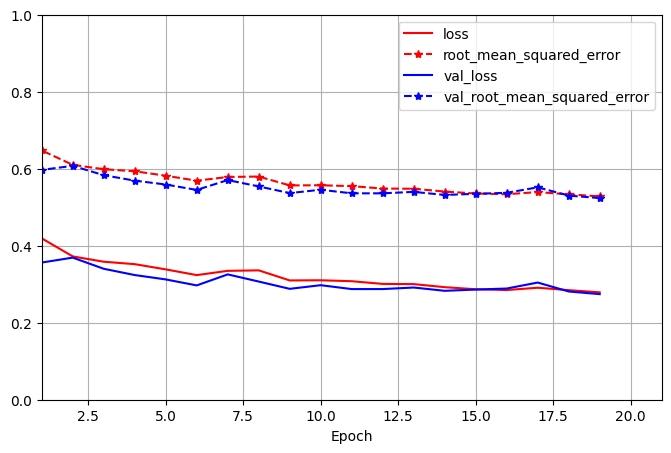

In [10]:
# Model training
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
model.norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_val, y_val))
# Show training and val errors
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[1, EPOCHS + 1], ylim=[0, 1], grid=True, xlabel="Epoch",
    # red/blue, dashed(--), continuous (-), shape(. or *)
    style=["r-", "r--*", "b-", "b--*"])  # train-loss=red(-), train-accuracy=red(--*), val_loss=blue(-), val_accuracy=blue(--*)
plt.show()

We evaluate the model.

162/162 [==============================] - 0s 1ms/step - loss: 0.2999 - root_mean_squared_error: 0.5476
Test MSE: 0.2999. Test RMSE: 0.5476
162/162 [==============================] - 0s 2ms/step


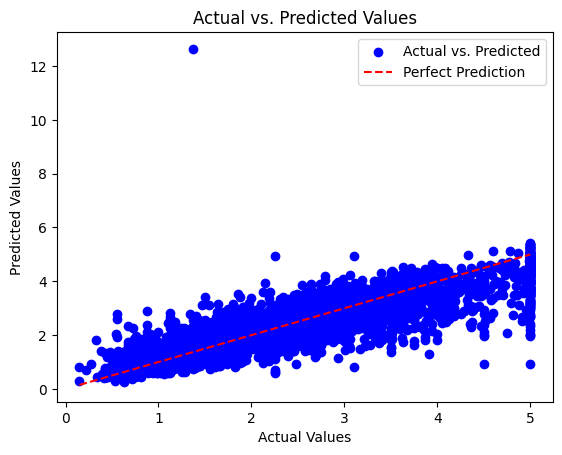

In [11]:
# Model evaluation
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse_test:.4f}. Test RMSE: {rmse_test:.4f}")
show_predictions(model, X_test, y_test)